# CS110: Designing a Scheduler

Minerva University

CS110: Problem Solving with Data Structures and Algorithms

Prof. Shekhar

October 31, 2023

## Setting up

### Regular Tasks

1. Breakfast, takes approximately 30 minutes.
2. CS111 Pre-Class Work, takes approximately 30 minutes.
3. CS110 Pre-Class Work, takes approximately 30 minutes
4. CS113 Pre-Class Work, takes approximately 30 minutes
5. CS111 Class, takes 1.5 hours and happens at 8:00 AM.
6. CS110 Class, takes 1.5 hours and happens at 10:00 AM.
7. CS113 Class, takes 1.5 hours and happens at 12:00 PM.
8. Lunch with Friends, takes approximately 45 minutes.
9. Korean Class, takes 1.5 hours and happens at 4:00 PM.

Since I have all of my 3 classes in one day, this list of tasks represent a normal day in my week. When I've had a very busy week, I resort to doing pre-class work during the same day of the class during the early morning. With respect to the nature of the tasks, some of the tasks mentioned above have occur during a set time such as the classes, while others can happen whenever there's a hole in my schedule.


### Rotation-city Centered Tasks

1. Attend to "Human Centered AI" Panel at Sookmyung Women's University, which takes 2 hours and happens at 5:00 PM.
2. Meet with Sookmyung Buddy to conduct an interview for GL93 Course, which takes 1 hour.
3. Meet with Sookmyung Buddy to take the self-guided history tour, which takes 1 hour.

For context, the first task is organized by SWU and the Finish Embassy in Seoul, focused on how to build human-centric Artificifial Intelligence and the efforts the Finish goverment is undertaking towards this. Personally, this event is relevant as it serves the purpose of networking with experts in my field of interest. In terms of cultural immersion, this task helped me understand the technological point of view of not just the Finish experts, but also the mostly South Korean audience, as the panel was interactive and the spectators had the chance to propose conversation topics or raise questions.

The second task falls under the Ethnograpic Assignment for the GL93 Course, where we were tasked with interviewing a non-Minerva about their culture and the impact it has had in their development. Initially, I decided to talk with my SWU Buddy, as she is a native in South Korea. As the conversation moved forward, my SWU Buddy introduced me to one of her friends, who has had the chance to travel around the world, and explore different cultures, since we both agreed that her friend might pose a better opportunity for drawing insights in my Ethnograpic Assignments.

The third task falls under the South Korea's Road to Democracy Lecture conducted at SWU, which was hosted for Minerva students to understand the decades-long process that lead to South Korea's democratization. As a complement to said lecture, we were tasked with visiting several historic places in Seoul, each encompasing a key component of the democratization process. One of the places we had to visit was the Seodemun Prison Museum, which used to be a prison used to torture political targets during the Japanese colonization,


## Preparing the Algorithmic Strategy

### A. Formulate a simple argument for why a priority queue is a particularly well-suited data structure to prioritize tasks in this context. Why don’t we simply sort a list of tasks?



> 1. An important consideration is to gauge whether you need one or more instances of priority queues. For instance, tasks can be time-flexible, and others might be fixed in time (you can prepare for class at any time before it starts, but the session time is fixed).
> 2. Would you separate these tasks into different priority queues to account for these two possibilities? Why or why not?
> 3. Feel free to provide a detailed contextualized answer, such as “at this stage in the algorithm, I will work with ____, and later on, I will use ____ to do _____.”


Scheduling is a well-studied problem, as it's recurrent in real-life engineering problems, for example scheduling jobs at a computer cluster, scheduling transactions, or simply a semi-managed calendar solution such as Google Calendar or Notion. From my experience and having read about this issue, I'd say a Priority Queue is the wrong (or at least, a suboptimal) data structure for this kind of problems:

1. Fixed priorities over time
2. No support for dependencies
3. No support for look-aheads
4. Expensive queries

Some of these drawbacks could be solved using custom data structures inspired from Segment Trees and Self-Balancing Binary Trees; we will touch on this with a practical example in the implementation section.

However, for the sake of the argument, let's say that for a basic scheduling utility a Priority Queue is a well-suited structure. Let's think of a basic scheduling utility that supports different priority policies for the tasks as well as fixed-time and dynamic tasks. To implement said scheduler we could use

1. A priority queue for the dynamic tasks: the usage of this queue is straightforward, as it would efficiently store the dynamic tasks ranked by their priorities as defined by the indicated policy.
2. A time priority queue for the fixed-time tasks: this queue would efficiently store the fixed-time tasks ranked by their starting times, where lower (earlier) starting times would have a higher priority.
3. A compound priority queue for the fixed-time tasks' (sub) dependencies: this queue would store each of the fixed tasks' direct and indirect dependencies. A third queue is required as a fixed task can have both fixed and dynamic tasks as dependencies, which is a special case. The prioritization is based in two factors: the associated fixed task starting time and the inherent priority of the task itself. This way, dependencies are ranked higher if their associated fixed task is happening earlier as well if their individual priorities are high.

Some of the benefits of using a priority queue are:

1. Efficient Insertion and Deletion ($O(\log{n})$): Priority queues enable swift insertion and deletion operations with a time complexity of $O(log n)$, allowing tasks to be dynamically managed based on their priorities, ensuring timely scheduling and execution.
2. Constant-Time Maximum Priority Query ($O(1)$): The ability to query the maximum priority element in constant time ($O(1)$) facilitates quick decision-making, aiding in efficient task prioritization and scheduling strategies.
3. Low Memory Overhead ($O(n)$): Priority queues have minimal memory overhead (space complexity of $O(n)$), ensuring optimal utilization of system resources, making them ideal for managing large sets of tasks without consuming excessive memory.

Regarding scheduling algorithm,

1. The priority queues could be populated as items are inserted into the scheduler, however, to support a stream of tasks and dependencies, the population of the queues is delayed until the scheduling method (`run`) is invoked. Even though Priority Queues support dynamic dependencies, each update would count as an extra insertion, which for a large number of tasks can be costly. Instead of immediately populating the queues, the tasks are inserted into hash maps, which have a constant time insertion and querying.
2. When the scheduling method (`run`) is invoked, the queues are populated ($O(E+V)$, where $E$ is the number of tasks and $V$ is the number of dependency relationships). Then, the scheduling method resolves which strategy to use based on the current state of the queues. In this step the efficient querying (constant time) of the most priority element is instrumental, as it helps to quickly resolve the strategy and evaluate scenarios, for example "do we have time to execute a dynamic task before the next fixed task or should we just wait?"
3. After a task is scheduled, implicit graph formed by the tasks and the dependency relationships is updated by removing the lastly scheduled task and the queues are reconstructed by adding the tasks that are currently unblocked by having one less dependency.
4. When the queues are being constructured, the auxiliary data structures (hash maps) come handy as it helps reducing the time-complexity for obtaining the tasks dependants from $O(n^2)$ to $O(n)$.


### B. Describe how your scheduler will work at a very high level. Consider explaining the algorithmic approach to scheduling to a peer who has not taken CS110 before.



> 1. Avoid using technical jargon and focus on how the algorithm digests several tasks and returns an output.
> 2. Ideally, your description must be clear and concise enough that anyone fluent in Python can implement it in code. Consider using creative resources to support your description (for instance, a flowchart).


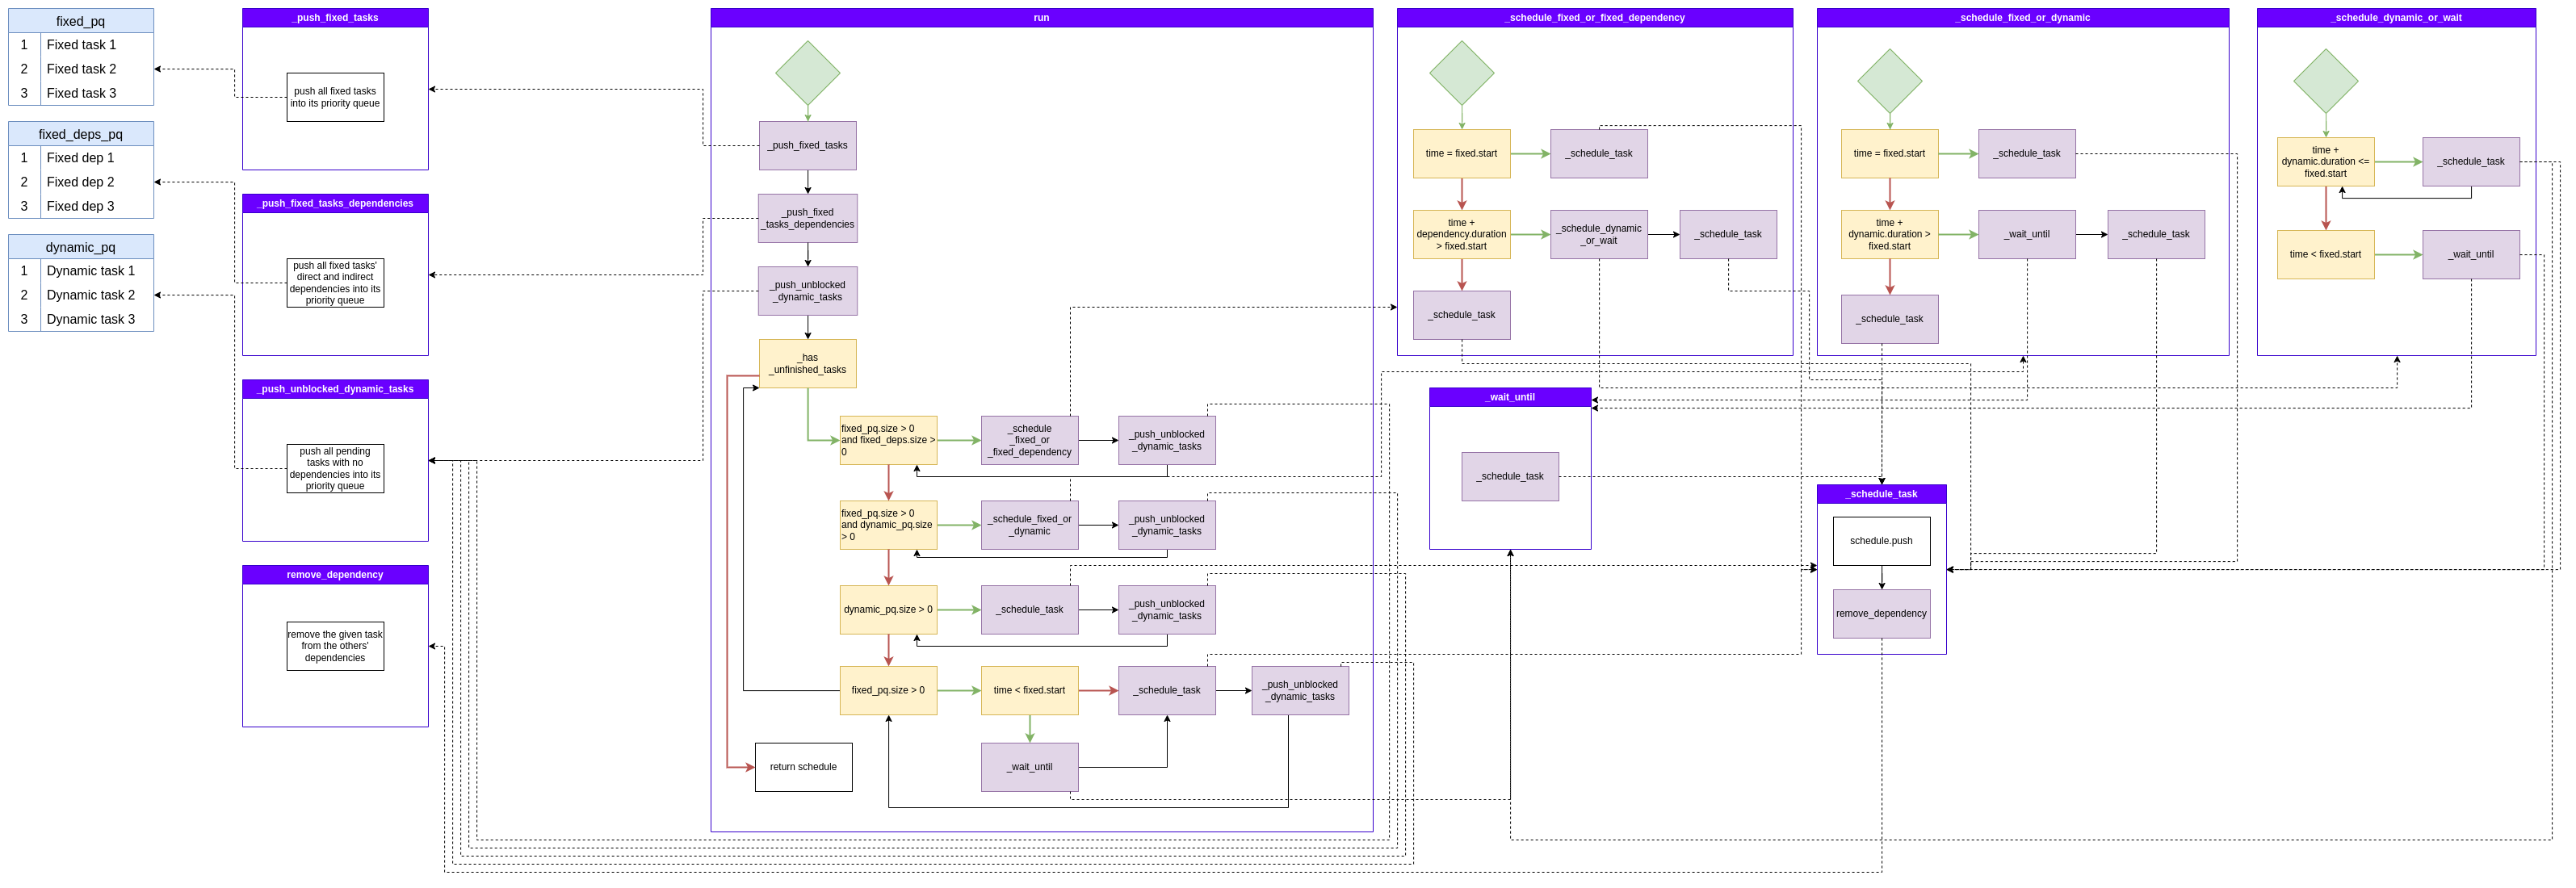

Before describing the high-level working of the scheduler, let's first define what this scheduler would be capable of:

1. Handling different priority policies, for example some people might value more doing lots of short tasks during the first part of the day rather than few big tasks. A user of this scheduler could formulate their own priority policy and pass it to scheduler so that the tasks are ranked accordingly.
2. Handling tasks that happen at a fixed time throughout the day, that might also depend on other fixed or dynamic tasks.

In the same spirit, we could define that this scheduler would not be capable of doing:

1. The proposed scheduler can only efficiently look at the next highest-ranked task, which limits its capabilities of solving time constraints. For example, we might have 30 minutes left before the next fixed task, but the highest-ranked dynamic task takes 45 minutes. An optimal scheduler would look-ahead at the next ranked tasks and determine if we could execute one of them even if they are not the most relevant task in the moment.
2. The proposed scheduler does not handle multi-tasking.

With this in mind, we can describe the high-level as follows:

1. Each fixed-time task is ranked according to their starting times, where earlier starting times are ranked higher
2. Each of the fixed-time tasks' direct and indirect dependencies is ranked so that if their associated fixed-task is happening earlier they will be ranked higher. On top of this, the dependencies associated with the same fixed task are ranked in terms of their individual priorities, this way relative priorities are preserved.
3. Each dynamic task that could be immediately executed (i.e., that does not have any pending dependency) is ranked according to the given priority policy.
4. With this setup, the scheduler runs until there's no task left to schedule, and at each iteration it tries to determine which scheduling strategy to follow:

- While there are fixed tasks and fixed tasks' dependencies,
  - If it is time to execute the next fixed task, schedule it.
  - If it there isn't enough time to execute the next fixed task dependency, attempt to schedule dynamic tasks otherwise just wait.
  - Else, schedule the next fixed task dependency
  - After this, re-build the ranking of the dynamic tasks with the updated dependencies as done in step (3)
- While there are fixed dependencies and dynamic tasks,
  - If it is time to execute the next fixed task, schedule it.
  - If it there isn't enough time to execute the next dynamic task, just wait.
  - Else, schedule the next dynamic task
  - After this, re-build the ranking of the dynamic tasks with the updated dependencies as done in step (3)
- While there are dynamic tasks
  - Schedule the next dynamic task
  - Re-build the ranking of the dynamic tasks with the updated dependencies as done in step (3)
- While there are any fixed task (edge case)
  - If it is not time to execute the next fixed task, wait
  - Schedule the next fixed task

5. Return the schedule.


### C. Now, let’s dive into the more technical part of the algorithmic approach. A priority queue demands a key with which to organize the different tasks. Explain how you have defined and computed the priority value of each task. This value is a profit/preference level, which you should compute dynamically (possibly as a function of all the other tasks included in the schedule and the properties of the task in question). This whitepaper is a good opportunity to apply #utility and motivate your utility function. Here are a few more notes:



> 1. The user is not expected to manually compute the priority value for a given task. Instead, the code should compute the overall utility value of an input task and use it as a key in the priority queue. Think about it—sometimes, you can only grasp how something is more important than something else when you consider several aspects to make a comparison. You love chocolate, but you also love coffee, and yet you need to choose one of them. What criterion goes into the decision to choose one over the other? The same applies to scheduling tasks.
> 2. The higher the priority value of a task, the more urgent it is to complete it first. The choice of max or min-heap should reflect that.
> 3. Writing “More important tasks have higher priorities” is not insightful. “Brushing my teeth has a priority of 70, and dressing up a priority of 60 because I want to brush my teeth before putting some clothes on” is not sufficiently explanatory either. Refer to the whitepaper mentioned earlier for explicit examples of computing utility values.
> 4. If task A has dependencies and task B has none, it seems reasonable to induce that task B will have higher priority than task A. So the number of dependencies can be an important attribute in computing the utility value. Of course, you may need to consider a bundle of aspects to determine the utility value. Whatever you choose,

The proposed scheduler does not prescribe any particular policy for priority.Instead, if allows for the user of the scheduler to come up with their own policy. The scheduler keeps track of several rankings during the scheduling process

1. Fixed tasks, these tasks are statically ranked wrt. the starting time of each of the tasks, where tasks happening earlier are ranked higher. To maintain the rank, the scheduler uses a a Priority Queue, whose underlying implementation relies on a Generic Heap with the heap property defined as `parent < child` (min-heap).
2. Fixed tasks' dependencies, these task are statically ranked wrt. the starting time of the associated fixed tasks' starting time as well as the individual initial priority of each of the tasks. To maintain the rank, the scheduler uses a a Priority Queue, whose underlying implementation relies on a Generic Heap with the heap property defined as `parent < child` (min-heap).
3. Dynamic tasks, these tasks are dynamically ranked according to the specified priority policy. In particular, the tasks with no pending dependencies are pushed into a Priority Queue (max-heap, with heap property defined as `parent > child`). After any task is scheduled, the priority of the newly unblocked tasks is computed with the updated dependency relationships.

Despite the scheduler not prescribing any priority policy, it provides a couple of priority policies. The first is a basic priority policy that follows these guidelines

- Shorter tasks have a higher priority.
- Tasks with more dependencies have a higher priority
- Tasks with higher self-reported priority have a higher priority

```python
def basic_priority_policy(
    scheduler: "Scheduler",
    task: Task,
    *,
    shorter_tasks_affinity: float = 1,
    dependents_affinity: float = 1,
    self_reported_priority_affinity: float = 1,
) -> float:
    """A basic task priority policy.

    This policy assigns a priority to a task based on the following criteria:
    - Shorter tasks have higher priority.
    - Tasks with more dependents have higher priority.
    - Tasks with higher self-reported priority have higher priority.

    Args:
        scheduler (Scheduler): The scheduler.
        task (Task): The task.
        shorter_tasks_affinity (float, optional): The shorter tasks affinity. Defaults to 1.
        dependents_affinity (float, optional): The dependents affinity. Defaults to 1.
        self_reported_priority_affinity (float, optional): The self-reported priority affinity. Defaults to 1.

    Returns:
        float: The priority.
    """

    priority = 0.0

    # Shorter tasks have higher priority
    priority += shorter_tasks_affinity / task.duration

    # Tasks with more dependencies have higher priority
    priority += len(scheduler.get_dependents(task)) * dependents_affinity

    # Tasks with higher self-reported priority have higher priority
    priority += task.priority * self_reported_priority_affinity

    return priority
```

Each of the guidelines' weight can be tweaked by the user. For example:

```python
from functools import partial

policy = partial(
    basic_priority_policy,
    shorter_tasks_affinity=3,
    dependents_affinity=0.2,
    self_reported_priority_affinity=10
)
```

In the example above the utility `partial` is used to specify runtime keyword arguments indicating that the user prefers:

- That shorter tasks have a weight of 3x in terms of priority, hence the user values them more
- Tasks with several dependents shouldn't really be overly prioritized. This means that the individual tasks are more important per se rather than a sequence of dependent tasks.
- That the user would like to have more control over their schedule, for which they value their own perception of priority.

Another example for a built-in priority policy is a keyword based priority, where tasks that contain a given keyword might get a priority multiplier:

```python
_multipliers = {
    "class": 3,
    "friends": 5,
    "cs11": 3,
    "breakfast": 6,
    "lunch": 6,
}


def keyword_based_priority_policy(
    _: "Scheduler",
    task: Task,
) -> float:
    """A keyword-based task priority policy.

    Args:
        scheduler (Scheduler): The scheduler.
        task (Task): The task.

    Returns:
        float: The priority.
    """

    normalized_name = task.name.lower()

    priority = float(task.priority)

    for keyword, multiplier in _multipliers.items():
        if keyword in normalized_name:
            priority *= multiplier

    return priority
```

This way the task "lunch with friends" would get a priority multiplier of $7\times6=42$ on top of the self-reported priority, which is defaulted to medium (2).


## Examples

In [21]:
# breakfast
breakfast = Task(
    id=0,
    name="Breakfast",
    duration=0.5,
    priority=TaskPriority.ABSOLUTE,
)

# cs111 pcw
cs111_pre_class_work = Task(
    id=1,
    name="CS111 Pre-Class Work",
    duration=0.5,
    priority=TaskPriority.HIGH,
)

# cs110 pcw
cs110_pre_class_work = Task(
    id=2,
    name="CS110 Pre-Class Work",
    duration=0.5,
    priority=TaskPriority.MEDIUM,
)

# cs113 pcw
cs113_pre_class_work = Task(
    id=3,
    name="CS113 Pre-Class Work",
    duration=0.5,
    priority=TaskPriority.MEDIUM,
)

# cs111
cs111_class = Task(
    id=4,
    name="CS111",
    duration=1.5,
    fixed=True,
    start=8,
)
cs111_class.add_dependency(breakfast)
cs111_class.add_dependency(cs111_pre_class_work)

# cs110
cs110_class = Task(
    id=5,
    name="CS110",
    duration=1.5,
    fixed=True,
    start=10,
)
cs110_class.add_dependency(cs110_pre_class_work)

# cs113
cs113_class = Task(
    id=6,
    name="CS113",
    duration=1.5,
    fixed=True,
    start=12,
)
cs113_class.add_dependency(cs113_pre_class_work)

# lunch with friends
lunch_with_friends = Task(
    id=7,
    name="Lunch with Friends",
    duration=0.75,
    priority=TaskPriority.MEDIUM,
)

# korean class
korean_class = Task(
    id=8,
    name="Korean",
    duration=1.5,
    fixed=True,
    start=16,
)
korean_class.add_dependency(lunch_with_friends)

# cs111 skill builder
human_centered_ai = Task(
    id=9,
    name="Human Centered AI @ SWU",
    duration=2,
    fixed=True,
    start=17,
    priority=TaskPriority.MEDIUM,
)

# cs113 skill builder
meet_buddy_for_interview = Task(
    id=10,
    name="Meeting SWU buddy for interview",
    duration=1,
    priority=TaskPriority.HIGH,
)

meet_buddy_for_tour = Task(
    id=11,
    name="Meeting SWU buddy for tour",
    duration=1,
    priority=TaskPriority.MEDIUM,
)

tasks = [
    breakfast,
    cs111_pre_class_work,
    cs110_pre_class_work,
    cs113_pre_class_work,
    cs111_class,
    cs110_class,
    cs113_class,
    lunch_with_friends,
    korean_class,
    human_centered_ai,
    meet_buddy_for_interview,
    meet_buddy_for_tour,
]

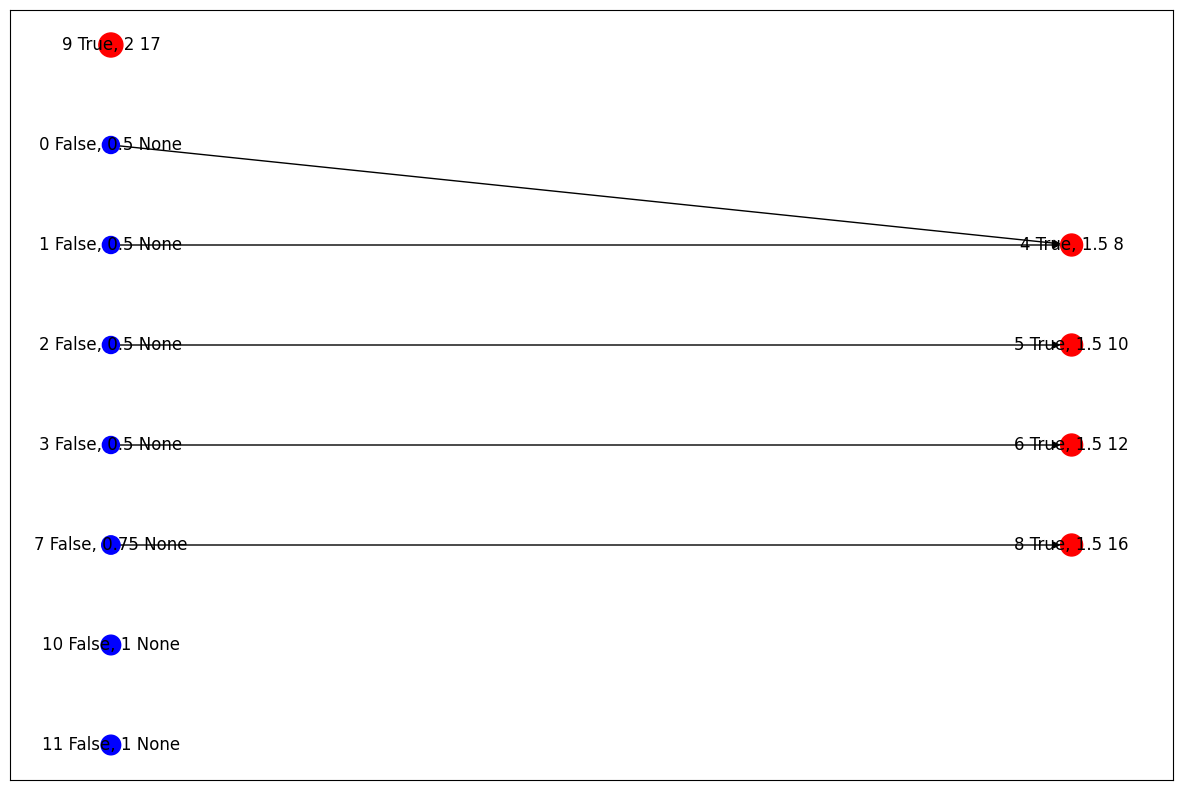

🕰 t=7.00
	started 'Breakfast' for 0.50 hours
	✅ t=7.50 task completed!
🕰 t=7.50
	started 'CS111 Pre-Class Work' for 0.50 hours
	✅ t=8.00 task completed!
🕰 t=8.00
	started 'CS111' for 1.50 hours
	✅ t=9.50 task completed!
🕰 t=9.50
	started 'CS110 Pre-Class Work' for 0.50 hours
	✅ t=10.00 task completed!
🕰 t=10.00
	started 'CS110' for 1.50 hours
	✅ t=11.50 task completed!
🕰 t=11.50
	started 'CS113 Pre-Class Work' for 0.50 hours
	✅ t=12.00 task completed!
🕰 t=12.00
	started 'CS113' for 1.50 hours
	✅ t=13.50 task completed!
🕰 t=13.50
	started 'Lunch with Friends' for 0.75 hours
	✅ t=14.25 task completed!
🕰 t=14.25
	started 'Meeting SWU buddy for interview' for 1.00 hours
	✅ t=15.25 task completed!
🕰 t=16.00
	started 'Korean' for 1.50 hours
	✅ t=17.50 task completed!
🕰 t=17.00
	started 'Human Centered AI @ SWU' for 2.00 hours
	✅ t=19.00 task completed!
🕰 t=19.00
	started 'Meeting SWU buddy for tour' for 1.00 hours
	✅ t=20.00 task completed!


In [22]:
import copy
import random

import matplotlib.pyplot as plt

scheduler = Scheduler.from_tasks(copy.deepcopy(tasks))
fig, ax = plt.subplots(figsize=(15, 10))
scheduler.plot(ax=ax)
plt.show()

schedule = scheduler.run(7, priority_policy=basic_priority_policy)
pretty_print(schedule)

_tasks = copy.deepcopy(tasks)
random.shuffle(_tasks)
_scheduler = Scheduler.from_tasks(_tasks)

assert _scheduler.run(7, priority_policy=basic_priority_policy) == schedule

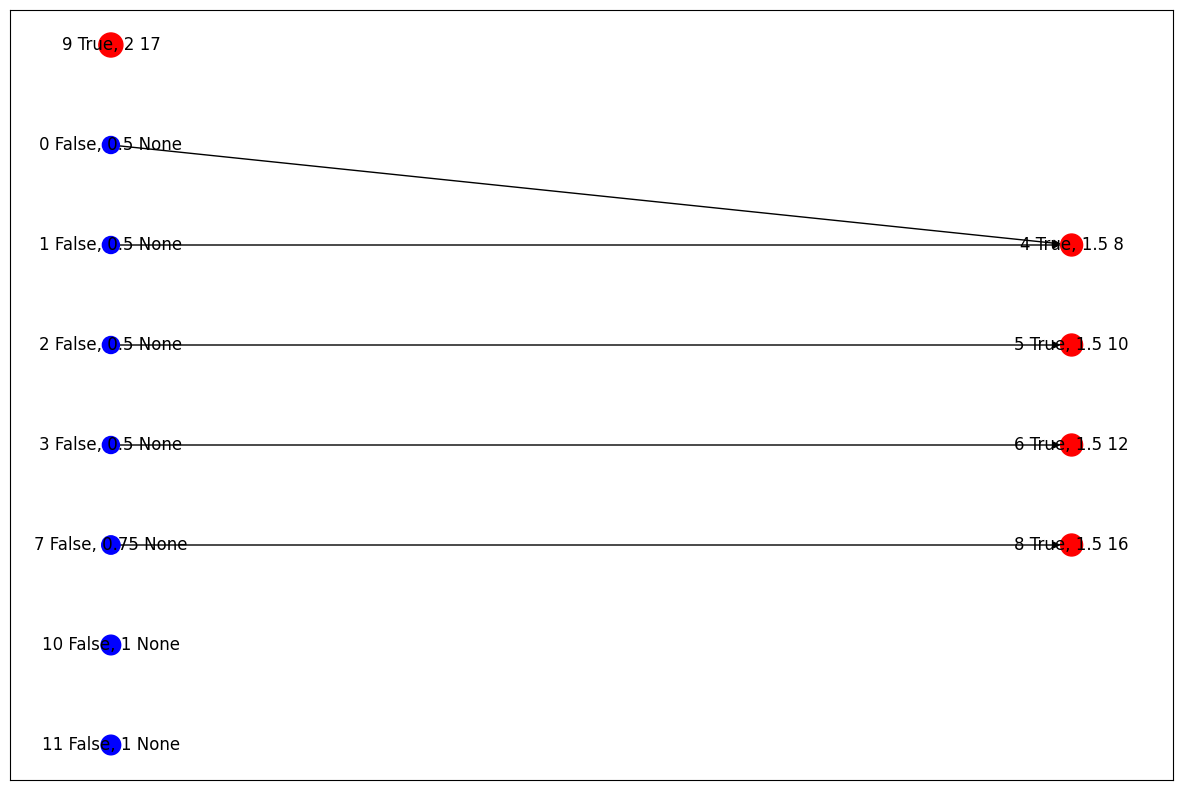

🕰 t=7.00
	started 'Breakfast' for 0.50 hours
	✅ t=7.50 task completed!
🕰 t=7.50
	started 'CS111 Pre-Class Work' for 0.50 hours
	✅ t=8.00 task completed!
🕰 t=8.00
	started 'CS111' for 1.50 hours
	✅ t=9.50 task completed!
🕰 t=9.50
	started 'CS110 Pre-Class Work' for 0.50 hours
	✅ t=10.00 task completed!
🕰 t=10.00
	started 'CS110' for 1.50 hours
	✅ t=11.50 task completed!
🕰 t=11.50
	started 'CS113 Pre-Class Work' for 0.50 hours
	✅ t=12.00 task completed!
🕰 t=12.00
	started 'CS113' for 1.50 hours
	✅ t=13.50 task completed!
🕰 t=13.50
	started 'Lunch with Friends' for 0.75 hours
	✅ t=14.25 task completed!
🕰 t=14.25
	started 'Meeting SWU buddy for interview' for 1.00 hours
	✅ t=15.25 task completed!
🕰 t=16.00
	started 'Korean' for 1.50 hours
	✅ t=17.50 task completed!
🕰 t=17.00
	started 'Human Centered AI @ SWU' for 2.00 hours
	✅ t=19.00 task completed!
🕰 t=19.00
	started 'Meeting SWU buddy for tour' for 1.00 hours
	✅ t=20.00 task completed!


In [23]:
_tasks = copy.deepcopy(tasks)
random.shuffle(_tasks)

scheduler = Scheduler.from_tasks(_tasks)
fig, ax = plt.subplots(figsize=(15, 10))
scheduler.plot(ax=ax)
plt.show()

schedule = scheduler.run(7, priority_policy=keyword_based_priority_policy)
pretty_print(schedule)

_tasks = copy.deepcopy(tasks)
random.shuffle(_tasks)
_scheduler = Scheduler.from_tasks(_tasks)

assert _scheduler.run(7, priority_policy=keyword_based_priority_policy) == schedule

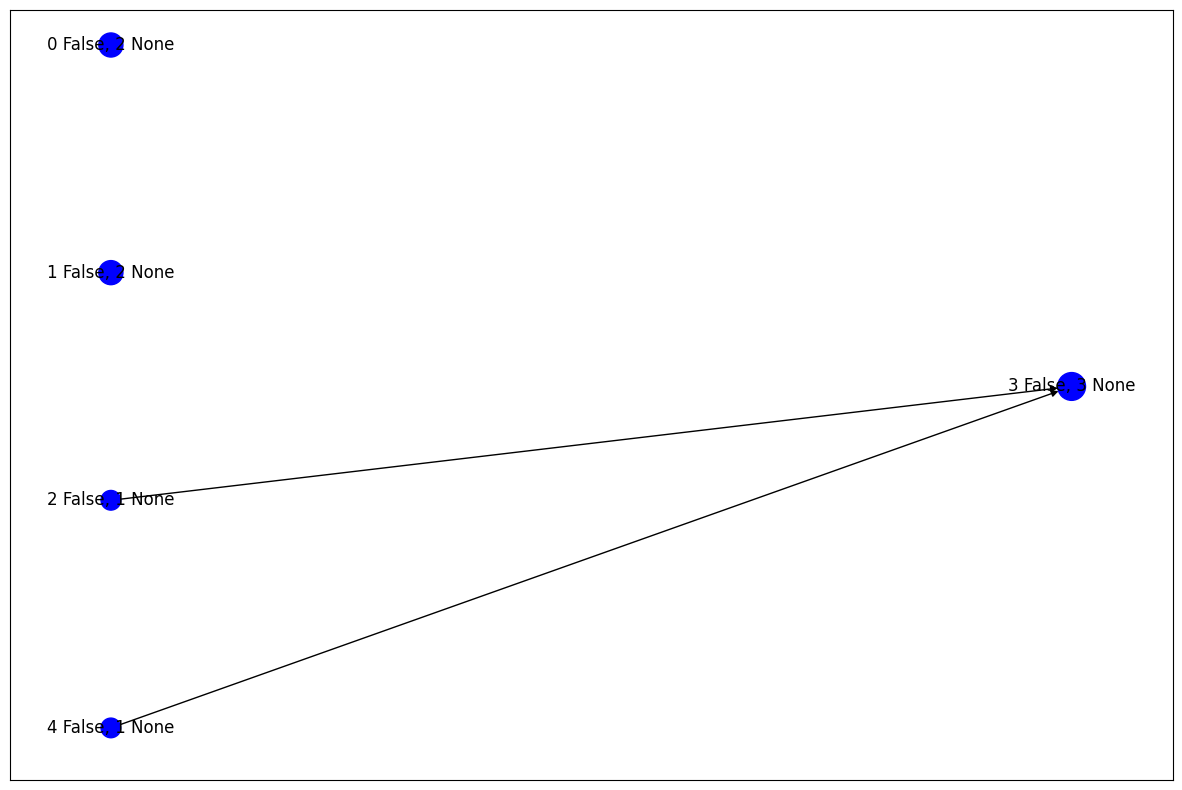

🕰 t=0.00
	started '4' for 1.00 hours
	✅ t=1.00 task completed!
🕰 t=1.00
	started '2' for 1.00 hours
	✅ t=2.00 task completed!
🕰 t=2.00
	started '1' for 2.00 hours
	✅ t=4.00 task completed!
🕰 t=4.00
	started '0' for 2.00 hours
	✅ t=6.00 task completed!
🕰 t=6.00
	started '3' for 3.00 hours
	✅ t=9.00 task completed!


In [24]:
tasks = random_tasks(5)
scheduler = Scheduler.from_tasks(copy.deepcopy(tasks))
fig, ax = plt.subplots(figsize=(15, 10))
scheduler.plot(ax=ax)
plt.show()

schedule = scheduler.run(0, priority_policy=basic_priority_policy)
pretty_print(schedule)

_tasks = copy.deepcopy(tasks)
random.shuffle(_tasks)
_scheduler = Scheduler.from_tasks(_tasks)

assert _scheduler.run(0, priority_policy=basic_priority_policy) == schedule

## Analysis of the Algorithm

### Advantages

The proposed scheduler can handle an incomplete but still practical set of input tasks. Some of the trait-offs made include poor handling of deeply nested fixed-time task dependencies as well as no look-ahead to overcome time constraints. However, these trait-offs allow for comparative advantages:

1. Querying Efficiency: The scheduler uses heap-based priority queues to efficiently manage tasks, ensuring that tasks with higher priorities are processed first. However, one of the main advantages of using these data structures is that we can always query the highest ranked tasks in constant time. For example, we can obtain the closest fixed-time task as well as the dynamic task with the highest priority in constant time.
2. Flexibility: The scheduler supports various types of tasks, including fixed-time tasks and non-fixed-time tasks with dependencies. It can handle different scheduling scenarios, making it flexible for a wide range of applications. Since the proposed scheduler cannot perform an efficient look-ahead, it allows for "breaks" or waiting the minimal necessary time so that it can continue scheduling tasks in the strictly increasing order of priority.
3. Priority Policy: The scheduler allows users to define custom priority policies for tasks. This feature enables users to prioritize tasks based on specific criteria, enhancing the scheduler's adaptability to different use cases.
4. Graph Representation: The proposed scheduler internally represents task dependencies as a graph, making it easy to visualize and reason about the relationships between tasks. This representation simplifies the task scheduling logic, especially when dealing with complex dependency structures.
5. Error Handling: The scheduler includes assertions and error messages to handle exceptional cases, ensuring that the scheduler operates correctly even when unexpected situations occur. Proper error handling improves the robustness of the scheduler.
6. Visualization: The code includes a `plot` method to visualize the task dependencies graph. This visualization can be invaluable for understanding the task relationships and diagnosing scheduling issues, providing a useful tool for developers and users.


### Flaws

1. Limitation in Look-Ahead Strategy: The scheduler lacks a look-ahead mechanism. When tasks in the dependency queue or non-fixed-time priority queue cannot be accommodated before a fixed-time event due to time constraints, the algorithm does not explore alternatives. It does not consider substituting tasks with shorter durations or higher priorities. Tasks in the heap are unsorted, hindering efficient selection based on both duration and priority. The absence of sorting based on duration further complicates task selection, making it challenging to optimize the scheduling process.
2. Mutable State Challenges: The scheduler heavily relies on mutable state, introducing potential issues related to concurrency and program predictability. The use of mutable state can obscure the flow of data and complicate debugging efforts, making it harder to comprehend the program's behavior.
3. Limited Error Handling and Task Validation: The code lacks robust error handling mechanisms. For instance, in the presence of cyclic task dependencies, the scheduler might enter an infinite loop or produce unexpected results. Additionally, the code does not adequately handle errors arising from invalid task configurations or inconsistent input data, potentially leading to runtime failures. Furthermore, the algorithm assumes that fixed-time tasks will not overlap, without explicit validation or handling for overlapping scenarios.
4. Insufficient Testing and Documentation: Comprehensive unit testing is absent in the codebase, leaving its functionality unverified under various conditions. The lack of detailed documentation further compounds the problem, making it difficult for users to understand the scheduler's usage and the underlying assumptions. Without proper tests and documentation, the reliability and usability of the scheduler remain uncertain.
5. Potential Performance Concerns: The scheduler's algorithm involves nested loops and multiple priority queue operations. These operations can become performance bottlenecks, especially when dealing with large sets of tasks. The absence of efficient data structures for look-ahead operations and querying time ranges restricts the scheduler's scalability. Performance issues may arise due to the algorithm's complexity and the lack of optimization techniques.
6. External Dependency Challenges: The code relies on external libraries, such as `networkx` for visualization. While visualization can be useful, it might not be essential for the core functionality of the scheduler. Depending on external libraries introduces unnecessary complexity and additional dependencies, potentially complicating deployment and maintenance processes.
7. Unexplained Magic Numbers and Lack of Constants: Within the code, magic numbers (e.g., 100) are used without adequate explanations or context. These magic numbers lack meaningful identifiers, making the code less readable and maintainable. It would be beneficial to replace these magic numbers with well-named constants, enhancing code readability and providing clear context for their usage.
8. Inefficient Priority Policy Evaluation: The scheduler evaluates the priority policy for each task scheduling decision. Depending on the complexity of the policy, this approach can be inefficient, particularly if the policy involves resource-intensive computations. Efficient evaluation strategies, such as caching or optimizing the policy logic, could enhance the scheduler's performance.


### Complexity Analysis

#### 1. Initializing the Scheduler:

- Time Complexity: O(1)
- Space Complexity: O(1)

#### 2. Adding Tasks:

- Time Complexity: O(1) per task added
- Space Complexity: O(n) for storing the tasks, where n is the number of tasks

#### 3. Adding Dependencies:

- Time Complexity: O(1) per dependency added
- Space Complexity: O(d) for storing dependencies, where d is the total number of dependencies across all tasks

#### 4. Pushing Fixed Tasks:

- Time Complexity: O(n), where n is the number of fixed tasks
- Space Complexity: O(1)

#### 5. Pushing Fixed Tasks' Dependencies:

- Time Complexity: O(E + V), where E is the total number of dependencies and V is the total number of tasks (using DFS traversal)
- Space Complexity: O(1)

#### 6. Pushing Unblocked Dynamic Tasks:

- Time Complexity: O(n), where n is the number of dynamic tasks
- Space Complexity: O(1)

#### 7. Scheduling Tasks:

- The tasks are inserted into their respective priority queues. In the worst case, each insertion performs operations proportional to the logarithm of the total number of tasks, i.e., O(log n) for each task. This is because we are using a heap-based priority queue for ranking the tasks.
- The loop runs until there are unfinished tasks. In the worst case, it iterates through all tasks.
- Inside the loop, scheduling operations depend on the priority queues' sizes, and each operation takes constant time or logarithmic time (for priority queue operations). In the worst case, it performs operations proportional to the number of tasks, i.e., O(n) for each iteration of the loop.
- Time Complexity: O(n^2) in the worst case, where n is the number of tasks (see experimental analysis below)
- Space Complexity: O(1)

#### 8. Removing Dependencies:

- Time Complexity: O(1) per dependency removed
- Space Complexity: O(1)

#### 9. Plotting the Graph:

- Time Complexity: O(n + d), where n is the number of tasks and d is the number of dependencies
- Space Complexity: O(n + d)

The overall complexity analysis reveals that the scheduler's most significant time complexity arises from task scheduling, reaching O(n^2) in the worst-case scenario. The space complexity is primarily determined by the number of tasks (O(n)) and their dependencies (O(d)), while other operations like adding tasks, dependencies, and graph plotting contribute linearly to the overall complexity. To optimize the current implementation, exploring advanced data structures and algorithms (such as segment trees or Fenwick trees) tailored for scheduling problems could enhance efficiency significantly. For instance, incorporating specialized data structures and algorithms could improve the overall performance by reducing the time complexity associated with scheduling tasks and managing their dependencies. Furthermore, employing graph traversal optimizations, such as topological sorting, can streamline fixed tasks' dependencies scheduling, ensuring a more efficient linear time complexity. Additionally, focusing on optimizing dependency removal operations, given their frequent updates, presents an opportunity for further performance enhancements. By embracing these optimizations and considering more sophisticated data structures, the scheduler's efficiency and scalability could be substantially improved, addressing the existing complexities and paving the way for a more robust scheduling solution.


In [19]:
import time

from tqdm import tqdm

N = 500
K = 3
MAX_TRIES = 10

times = []
for n in tqdm(range(1, N + 1)):
    samples = []

    tries = 0
    k = 0
    while k < K and tries < MAX_TRIES:
        try:
            tasks = random_tasks(n)
            scheduler = Scheduler.from_tasks(tasks)

            start = time.perf_counter()
            scheduler.run(0)
            end = time.perf_counter()

            samples.append(end - start)

            k += 1
        except Exception as e:
            pass
        finally:
            tries += 1

    if k > 0:
        times.append(sum(samples) / len(samples))
    else:
        times.append(None)

100%|██████████| 500/500 [00:48<00:00, 10.40it/s] 


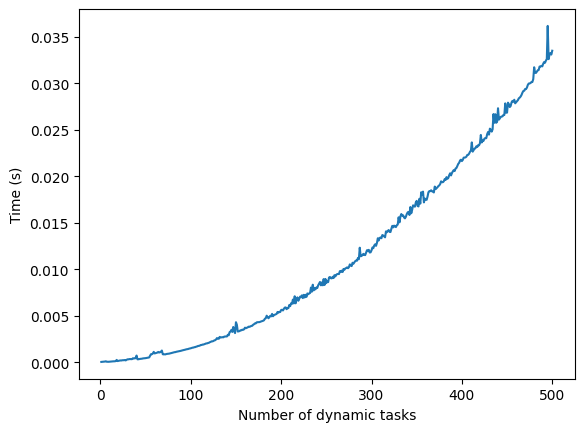

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, N + 1), times)
plt.xlabel("Number of dynamic tasks")
plt.ylabel("Time (s)")
plt.show()

## Thought Process

https://www.loom.com/share/d71295fd0f8245719f0d16b0c87901ed?sid=c5e2ba7d-b8eb-42f4-b645-aae8ff8253bf

## LOs and HCs

## #AlgoStratDataStruct (80 words)

For the scheduling algorithm I have implemented a generic heap that can serve both as a max and min heap depending how it is initialized. However, instead of using a basic heap, I used a heap-based priority queue that allows for efficiently keeping track of the items' priority. In this assignment, I've also outlined how despite these data structure handling a significant portion of the practical scenarios, it does not solve the entire problem as it doesn't allow for look-ahead.

## #ComplexityAnalysis (72 words)

In my analytical assessment of algorithmic efficiency, I rigorously computed the Big-O time complexity for both best-case and worst-case scenarios. This calculation was predicated upon a comprehensive analysis of the algorithm's constituent operations, factoring in the highest scaling operation within the algorithm. In addition to theoretical analysis, I conducted empirical studies to ascertain the time complexity. Furthermore, a theoretical analysis of the space complexity as also outlined for each of the operations.

## #ComputationalCritique (62 words)

In this assignment I've critiqued several key aspects that affect the algorithm's performance, such as the inneficient evaluation of the priority values and the amount of nested loops which could be reduced by using more appropriate data structures. To overcome the limitations, I briefly mentioned data structures that could be better suited for the problem, such as Segment Trees and Fenwick Trees.

## #CodeReadability (82 words)

In crafting the Python code for the scheduler algorithms, I prioritized clarity and comprehensibility. To this end, I meticulously documented the classes and methods using descriptive docstrings. These docstrings elucidated the purpose, input parameters, and return values of each function. Additionally, I provided contextual comments where necessary, focusing on elucidating complex sections of the code while abstaining from commenting on self-evident components. Moreover, I conscientiously assigned meaningful variable names to enhance code readability, ensuring the representation of each variable was readily discernible.

## #PythonProgramming (60 words)

In my implementation of the scheduler algorithms, I adhered to the principles of Object-Oriented Programming (OOP). I systematically structured the codebase using classes, defining their attributes and methods with precision. To empirically assess the time complexity, I meticulously executed a series of experiments, capturing data across various input sizes. Subsequently, I visualized the results using Python, employing appropriate graphical representations.

## #Professionalism (65 words)

Throughout the entirety of this assignment, I meticulously adhered to the stipulated instructions. My approach was underpinned by a steadfast commitment to academic integrity. I diligently acknowledged all pertinent sources, including individuals and class sessions, thereby upholding scholarly ethics. Notably, I refrained from utilizing any AI tools in the completion of this assignment, thereby ensuring a genuine demonstration of my mastery of the course material.

## #networks (187 words)

The scheduler presented serves as an excellent application of networks, specifically social networks, due to its intricate understanding and utilization of connections among tasks. In the scheduler, tasks are represented as nodes, and the dependencies between tasks form the edges of the network. By applying network analysis to this structure, the scheduler comprehensively captures the interdependencies and relationships among various tasks. This approach enables the identification of critical paths, task priorities, and scheduling sequences that might not be evident by merely examining individual task characteristics. Much like nodes in a social network, where individuals' influence is not solely determined by their personal traits but also by their position in the network, tasks' scheduling and prioritization are influenced by their connections and dependencies within the scheduler's structure. The scheduler's ability to dynamically adapt to changes in task relationships mirrors the concept of network effects, where alterations in connections can significantly impact outcomes. This sophisticated understanding and application of network principles demonstrate a clear mastery of the learning outcome, providing a robust and well-justified example of how network analysis can be productively employed to optimize task scheduling and management.


## AI Statement

Only Grammarly's AI was used to improve the writing in this assignment.

## References

- https://docs.python.org/3/library/functools.html
- https://docs.python.org/3/library/dataclasses.html#dataclasses.field
- https://stackoverflow.com/questions/3752618/adding-element-to-list-while-iterating
- https://www.geeksforgeeks.org/python-visualize-graphs-generated-in-networkx-using-matplotlib/
- https://stackoverflow.com/questions/10104700/how-to-set-networkx-edge-labels-offset-to-avoid-label-overlap
- https://stackoverflow.com/questions/27030473/how-to-set-colors-for-nodes-in-networkx
- https://wiki.python.org/moin/TimeComplexity
- https://docs.python.org/3/library/bisect.html

## Implementation

### Heap

In [1]:
from typing import Callable, TypeVar, Generic


T = TypeVar("T")
Comparison = Callable[[T, T], bool]

_default_comparison: Comparison = lambda a, b: a > b
"""Comparison: Default comparison function. If used, the heap will be a max-heap."""


class Heap(Generic[T]):
    """Generic heap implementation."""

    values: list[T]
    """list[T]: List of values in the heap."""

    comparison: Comparison
    """Comparison: Comparison function used to determine the heap property."""

    @staticmethod
    def left(i: int) -> int:
        """Returns the index of the left child of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int: Index of the left child.
        """

        return 2 * i + 1

    @staticmethod
    def right(i: int) -> int:
        """Returns the index of the right child of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int: Index of the right child.
        """

        return 2 * i + 2

    @staticmethod
    def parent(i: int) -> int:
        """Returns the index of the parent of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int: Index of the parent.
        """

        return (i - 1) // 2

    def __init__(self, *, comparison: Comparison = _default_comparison) -> None:
        self.values = []
        self.comparison = comparison

    @property
    def size(self) -> int:
        """Returns the number of elements in the heap."""

        return len(self.values)

    def _swap(self, i: int, j: int) -> None:
        """Swaps the values at indices i and j.

        Args:
            i (int): Index of the first value.
            j (int): Index of the second value.
        """

        self.values[i], self.values[j] = self.values[j], self.values[i]

    @classmethod
    def from_list(cls, values: list[T], **kwargs) -> "Heap":
        """Creates a heap from a list of values.

        Args:
            values (list[T]): List of values to be inserted into the heap.
            **kwargs: Keyword arguments to be passed to the constructor.

        Returns:
            Heap: A heap containing the values.
        """

        heap = cls(**kwargs)
        heap.values = values
        heap.build()
        return heap

    def build(self) -> None:
        """Builds a heap from the values by applying heapify from the bottom up."""

        for i in range(len(self.values) // 2, -1, -1):
            self.heapify(i)

    def heapify(self, i: int) -> None:
        """Restores the heap property at index i.

        Args:
            i (int): Index of the node.

        Note:
            * Assumes that the subtrees of i are heaps.
        """

        left = self.left(i)
        right = self.right(i)

        largest = i

        if left < len(self.values) and self.comparison(
            self.values[left], self.values[largest]
        ):
            largest = left

        if right < len(self.values) and self.comparison(
            self.values[right], self.values[largest]
        ):
            largest = right

        if largest != i:
            self._swap(i, largest)
            self.heapify(largest)

    def push(self, value: T) -> None:
        """Pushes a value onto the heap.

        Args:
            value (T): Value to be pushed onto the heap.
        """

        self.values.append(value)

        i = len(self.values) - 1
        while i > 0 and not self.comparison(
            self.values[self.parent(i)], self.values[i]
        ):
            self._swap(i, self.parent(i))
            i = self.parent(i)

    def _pop(self) -> T:
        """Pops a single value from the heap. Does not check if the heap is empty.

        Returns:
            T: Value with the highest (or lowest, per the indicated comparison) priority.
        """

        self._swap(0, len(self.values) - 1)
        value = self.values.pop()
        self.heapify(0)
        return value

    def pop(self) -> T:
        """Pops a single value from the heap.

        Returns:
            T: Value with the highest (or lowest, per the indicated comparison) priority.
        """

        assert not self.empty()

        return self._pop()

    def pop_k(self, k) -> list[T]:
        """Pops k values from the heap.

        Args:
            k (int): Number of values to pop.

        Returns:
            list[T]: List of values with the highest (or lowest, per the
                indicated comparison) priority.
        """

        assert k > 0
        assert k <= len(self.values)

        values = []
        for _ in range(k):
            values.append(self._pop())

        return values

    def empty(self) -> bool:
        """Returns True if the heap is empty."""

        return len(self.values) == 0

    def peek(self) -> T:
        """Returns the value with the highest priority."""

        assert len(self.values) > 0

        return self.values[0]


### Priority Queue

In [2]:
class PriorityQueue(Heap[tuple[float, T]]):
    """Generic priority queue implementation."""

    priorities: dict[T, float]
    """dict[T, float]: Dictionary mapping values to their priorities."""

    def __init__(self, *, comparison: Comparison = _default_comparison) -> None:
        super().__init__(comparison=comparison)
        self.priorities = {}

    def push(self, value: tuple[float, T]) -> None:
        """Pushes a value onto the priority queue.

        Args:
            value (tuple[float, T]): Value to be pushed onto the priority queue.
        """

        _priority, _value = value

        if _value in self.priorities:
            raise ValueError(f"Value {_value} already in the priority queue")

        self.priorities[_value] = _priority

        return super().push(value)

    def _pop(self) -> tuple[float, T]:
        """
        Pops a single value from the priority queue. Does not check if the
        priority queue is empty.

        Returns:
            tuple[float, T]: Value with the highest (or lowest, per the
                indicated comparison) priority.
        """

        value = super()._pop()

        _, _value = value
        self.priorities.pop(_value)

        return value


In [ ]:
"""Unit tests for the scheduler, and the underlying Heap and PriorityQueue data structures."""

import unittest
import random

from tqdm import tqdm  # type: ignore

random.seed(42)


class TestHeap(unittest.TestCase):
    """Unit tests for the Heap data structure."""

    def test_build(self):
        """Tests the construction of a max-heap from a list of values."""

        for n in tqdm(range(0, 100)):
            values = list(range(n))
            random.shuffle(values)

            heap = Heap.from_list(values)

            stack = [0]

            while stack:
                i = stack.pop()

                left = heap.left(i)
                right = heap.right(i)

                if left < len(heap.values):
                    self.assertGreaterEqual(heap.values[i], heap.values[left])
                    stack.append(left)

                if right < len(heap.values):
                    self.assertGreaterEqual(heap.values[i], heap.values[right])
                    stack.append(right)

    def test_heapify(self):
        """Tests the heapify operation to restore the heap property after a value is changed."""

        for n in tqdm(range(0, 100)):
            values = list(range(n))
            random.shuffle(values)

            heap = Heap.from_list(values)

            # pylint: disable=consider-using-enumerate
            for i in range(len(heap.values)):
                heap.heapify(i)

                left = heap.left(i)
                right = heap.right(i)

                if left < len(heap.values):
                    self.assertGreaterEqual(heap.values[i], heap.values[left])

                if right < len(heap.values):
                    self.assertGreaterEqual(heap.values[i], heap.values[right])

    def test_push(self):
        """Tests the push operation to add a value to the heap."""

        heap = Heap()

        for n in tqdm(range(0, 100)):
            values = list(range(n))
            random.shuffle(values)

            for value in values:
                heap.push(value)

            # pylint: disable=consider-using-enumerate
            for i in range(len(heap.values)):
                left = heap.left(i)
                right = heap.right(i)

                if left < len(heap.values):
                    self.assertGreaterEqual(heap.values[i], heap.values[left])

                if right < len(heap.values):
                    self.assertGreaterEqual(heap.values[i], heap.values[right])

    def test_pop(self):
        """Tests the pop operation to remove the maximum value from the heap."""

        for n in tqdm(range(0, 100)):
            values = list(range(n))
            random.shuffle(values)

            heap = Heap.from_list(values)

            for i in range(n - 1, -1, -1):
                self.assertEqual(heap.pop(), i)


class TestPriorityQueue(unittest.TestCase):
    """Unit tests for the PriorityQueue data structure."""

    def test_peek(self):
        """Tests the peek operation to return the maximum value from the priority queue."""

        queue = PriorityQueue()

        for n in tqdm(range(0, 100)):
            values = list(range(n))
            random.shuffle(values)

            for value in values:
                queue.push((value, value))

            for i in range(n - 1, -1, -1):
                _, value = queue.peek()
                self.assertEqual(value, i)
                queue.pop()


if __name__ == "__main__":
    unittest.main()

### Data models

In [8]:
"""Definitions of basic data models for the scheduler utility."""

from dataclasses import dataclass, field
from typing import Optional
from enum import IntEnum, Enum, auto


class TaskPriority(IntEnum):
    """An enum defining standard levels of self-reported priority."""

    LOW = 1
    MEDIUM = 2
    HIGH = 3
    ABSOLUTE = 4


class TaskStatus(Enum):
    """An enum defining the statuses for a task."""

    PENDING = auto()
    QUEUED = auto()
    IN_PROGRESS = auto()
    FINISHED = auto()


@dataclass(order=True)
class Task:
    """Dataclass for a Task"""

    id: int
    """int: Unique identifier for a task."""

    name: str
    """str: Name of the task or event."""

    duration: float = field(compare=True)
    """
    float: Duration of the task or event. Units are determined depending on the 
    overall usage of the Scheduler utility
    """

    description: Optional[str] = None
    """Optional[str]: Description of the task or event."""

    fixed: bool = field(default=False)
    """bool: Indicates whether or not this event happens at a fixed time."""

    start: Optional[float] = field(default=None)
    """Optional[float]: Indicates the starting time of the event if it is a fixed event."""

    dependencies: set["Task"] = field(default_factory=set)
    """set[Task]: Indicates the tasks that must be resolved before scheduling this task."""

    priority: TaskPriority = field(default=TaskPriority.MEDIUM)
    """TaskPriority: Self-reported priority for this task."""

    status: TaskStatus = field(default=TaskStatus.PENDING)
    """TaskStatus: Indicates the status in the scheduling process"""

    def __hash__(self) -> int:
        """
        Computes the hash (unique identifier) for this Task.
        Used for fast look-ups in hash maps.
        """

        return hash(self.id)

    def add_dependency(self, task: "Task") -> None:
        """Adds a dependency to this task."""

        self.dependencies.add(task)

    def remove_dependency(self, task: "Task") -> None:
        """Removes a dependency from this task."""

        self.dependencies.remove(task)


### Algorithms

In [9]:
"""Useful utility algorithms for the scheduler."""

from collections import defaultdict
from typing import Callable, Iterable, Optional, TypeVar

T = TypeVar("T")


def bfs(
    *,
    start: Optional[T] = None,
    stack: Optional[list[T]] = None,
    get_neighbors: Callable[[T], Iterable[T]] = lambda node: [],
    on_visit: Callable[[T], None | bool] = lambda parent: None,
):
    """Generic Breadth-First Search algorithm

    Note:
        * This assumes the underlying graph is a Directed Acyclic Graph
        * Allows for early-stopping the exploration of paths
    """

    if not start and not stack:
        raise ValueError("Either start or stack must be provided")

    if start and stack:
        raise ValueError("Either start or stack must be provided")

    if start:
        stack = [start]

    assert stack is not None

    while len(stack) > 0:
        node = stack.pop()

        should_continue = on_visit(node)

        # Allows for early-stopping
        if should_continue is not None and not should_continue:
            continue

        for neighbor in get_neighbors(node):
            stack.append(neighbor)


def dfs(
    *,
    start: Optional[T] = None,
    queue: Optional[list[T]] = None,
    get_neighbors: Callable[[T], Iterable[T]] = lambda node: [],
    on_visit: Callable[[T], None | bool] = lambda node: None,
):
    """Generic Depth-First Search algorithm

    Note:
        * This assumes the underlying graph is a Directed Acyclic Graph
        * Allows for early-stopping the exploration of paths
    """

    if not start and not queue:
        raise ValueError("Either start or stack must be provided")

    if start and queue:
        raise ValueError("Either start or stack must be provided")

    if start:
        queue = [start]

    assert queue is not None

    while len(queue) > 0:
        node = queue.pop(0)

        should_continue = on_visit(node)

        if should_continue is not None and not should_continue:
            continue

        for neighbor in get_neighbors(node):
            queue.append(neighbor)


def toposort(g: dict[T, set[T]]) -> list[T]:
    """Generic Topological Sort algorithm"""

    in_degrees: defaultdict[T, int] = defaultdict(lambda: 0)

    for neighbors in g.values():
        for neighbor in neighbors:
            in_degrees[neighbor] += 1

    queue = [node for node in g.keys() if in_degrees[node] == 0]

    sorted_nodes = []
    while len(queue) > 0:
        node = queue.pop(0)

        sorted_nodes.append(node)

        for neighbor in g[node]:
            in_degrees[neighbor] -= 1

            if in_degrees[neighbor] == 0:
                queue.append(neighbor)

    return sorted_nodes


### Scheduler

In [10]:
"""A task scheduler utility."""

from collections import defaultdict
from typing import Callable, Iterable, Optional

import networkx as nx  # type: ignore

TaskPriorityPolicy = Callable[["Scheduler", Task], float]


def basic_priority_policy(
    scheduler: "Scheduler",
    task: Task,
    *,
    shorter_tasks_affinity: float = 1,
    dependents_affinity: float = 1,
    self_reported_priority_affinity: float = 1,
) -> float:
    """A basic task priority policy.

    This policy assigns a priority to a task based on the following criteria:
    - Shorter tasks have higher priority.
    - Tasks with more dependents have higher priority.
    - Tasks with higher self-reported priority have higher priority.

    Args:
        scheduler (Scheduler): The scheduler.
        task (Task): The task.
        shorter_tasks_affinity (float, optional): The shorter tasks affinity. Defaults to 1.
        dependents_affinity (float, optional): The dependents affinity. Defaults to 1.
        self_reported_priority_affinity (float, optional): The self-reported priority affinity. Defaults to 1.

    Returns:
        float: The priority.
    """

    priority = 0.0

    # Shorter tasks have higher priority
    priority += shorter_tasks_affinity / task.duration

    # Tasks with more dependencies have higher priority
    priority += len(scheduler.get_dependents(task)) * dependents_affinity

    # Tasks with higher self-reported priority have higher priority
    priority += task.priority * self_reported_priority_affinity

    return priority


_multipliers = {
    "class": 3,
    "friends": 5,
    "cs11": 3,
    "breakfast": 6,
    "lunch": 6,
}


def keyword_based_priority_policy(
    _: "Scheduler",
    task: Task,
) -> float:
    """A keyword-based task priority policy.

    Args:
        scheduler (Scheduler): The scheduler.
        task (Task): The task.

    Returns:
        float: The priority.
    """

    normalized_name = task.name.lower()

    priority = float(task.priority)

    for keyword, multiplier in _multipliers.items():
        if keyword in normalized_name:
            priority *= multiplier

    return priority


def pretty_print(schedule: list[tuple[float, Task]]) -> None:
    """Pretty prints a schedule.

    Args:
        schedule (list[tuple[float, Task]]): The schedule.
    """

    for time, task in schedule:
        print(f"🕰 t={time:.2f}")
        print(f"\tstarted '{task.name}' for {task.duration:.2f} hours")
        print(f"\t✅ t={time+task.duration:.2f} task completed!")


class Scheduler:
    """Task scheduler utility class.

    This class is responsible for generating a schedule for a given set of tasks.
    The schedule is a list of tuples, where each tuple contains the time at which
    the task should start and the task itself.

    The scheduler is able to schedule tasks with dependencies, fixed-time tasks
    and non-fixed-time tasks. The scheduler is also able to schedule tasks with
    priorities, the priority of a task is a float number that represents the
    importance of the task, the higher the number the more important the task is.

    Example:
        >>> from scheduler import Scheduler, Task
        >>> tasks = [
        ...     Task(id=1, name="A", duration=1, fixed=True, start=0),
        ...     Task(id=2, name="B", duration=1, fixed=True, start=1),
        ...     Task(id=3, name="C", duration=1, fixed=False),
        ...     Task(id=4, name="D", duration=1, fixed=False),
        ]
        >>> scheduler = Scheduler.from_tasks(tasks)
        >>> schedule = scheduler.run(start_time=0) # by default uses no priority
        >>> for time, task in schedule:
        ...     print(f"{task.name} @ {time}")
        A @ 0
        B @ 1
        C @ 2
        D @ 3

    Attributes:
        _priority_policy (TaskPriorityPolicy): The task priority policy.
        schedule (list[tuple[float, Task]]): The schedule.
        fixed_tasks (set[Task]): The set of fixed-time tasks.
        fixed_dependencies_tasks (set[Task]): The set of fixed-time tasks'
            dependencies.
        dynamic_tasks (set[Task]): The set of non-fixed-time tasks.
        fixed_pq (PriorityQueue[Task]): The fixed-time tasks priority queue. The
            priority of a task is its start time (increasing order priority).
        fixed_dependencies_pq (PriorityQueue[Task]): The fixed-time tasks'
            dependencies priority queue. The priority of a task is its start time
            (increasing order priority).
        dynamic_pq (PriorityQueue[Task]): The non-fixed-time tasks priority queue.
            The priority of a task is its priority (decreasing order priority).
        tasks_map (dict[int, Task]): A map from task id to task.
        tasks_dependents (defaultdict[int, set[Task]]): A map from task id to
            task dependents.

    Todo:
        * Use a data structure that efficiently supports look-ahead operations.
        * Use a data structure that efficiently supports querying ranges of time.
            For example, a segment tree.
        * Refactor this class so that it uses immutable data structures.
    """

    _priority_policy: TaskPriorityPolicy
    """TaskPriorityPolicy: The task priority policy."""

    schedule: list[tuple[float, Task]]
    """list[tuple[float, Task]]: The schedule. Only populated after running the scheduler."""

    fixed_tasks: set[Task]
    """set[Task]: The set of fixed-time tasks. A set is chosen for fast look-up."""

    fixed_dependencies_tasks: set[Task]
    """set[Task]: The set of fixed-time tasks' dependencies. A set is chosen for fast look-up."""

    dynamic_tasks: set[Task]
    """set[Task]: The set of non-fixed-time tasks. A set is chosen for fast look-up."""

    fixed_pq: PriorityQueue[Task]
    """
    PriorityQueue[Task]: The fixed-time tasks priority queue. The priority of a task is its 
    start time (increasing order priority).
    """

    fixed_dependencies_pq: PriorityQueue[Task]
    """
    PriorityQueue[Task]: The fixed-time tasks' dependencies priority queue. The priority of a task
    is its start time (increasing order priority).
    """

    dynamic_pq: PriorityQueue[Task]
    """
    PriorityQueue[Task]: The non-fixed-time tasks priority queue. The priority of a task is its 
    priority (decreasing order priority).
    """

    tasks_map: dict[int, Task]
    """dict[int, Task]: A map from task id to task. A map is chosen for fast look-up."""

    tasks_dependents: defaultdict[int, set[Task]]
    """
    defaultdict[int, set[Task]]: A map from task id to task dependents. 
    A map is chosen for fast look-up.
    """

    def __init__(
        self,
        *,
        priority_policy: TaskPriorityPolicy = basic_priority_policy,
    ) -> None:
        self._priority_policy = priority_policy

        self.schedule = []

        self.fixed_tasks = set()
        self.fixed_dependencies_tasks = set()
        self.dynamic_tasks = set()

        self.fixed_pq: PriorityQueue[Task] = PriorityQueue(
            comparison=lambda x, y: x < y
        )
        self.fixed_dependencies_pq: PriorityQueue[Task] = PriorityQueue(
            comparison=lambda x, y: x < y
        )
        self.dynamic_pq: PriorityQueue[Task] = PriorityQueue()

        self.tasks_map = {}
        self.tasks_dependents = defaultdict(set)

    @classmethod
    def from_tasks(
        cls,
        tasks: list[Task],
        **kwargs,
    ) -> "Scheduler":
        """Initializes a scheduler from a list of tasks

            Args:
                tasks (list[Task]): The list of tasks.
                **kwargs: The keyword arguments to pass to the scheduler constructor.

            Returns:
                Scheduler: The scheduler.

        Example:
            >>> from scheduler import Scheduler, Task
            >>> tasks = [
            ...     Task(id=1, name="A", duration=1, fixed=True, start=0),
            ...     Task(id=2, name="B", duration=1, fixed=True, start=1),
            ...     Task(id=3, name="C", duration=1, fixed=False),
            ...     Task(id=4, name="D", duration=1, fixed=False),
            ]
            >>> scheduler = Scheduler.from_tasks(tasks)
            >>> schedule = scheduler.run(start_time=0) # by default uses no priority
            >>> for time, task in schedule:
            ...     print(f"{task.name} @ {time}")
            A @ 0
            B @ 1
            C @ 2
            D @ 3
        """

        scheduler = cls(**kwargs)

        for task in tasks:
            scheduler.add_task(task)

        return scheduler

    @property
    def tasks(self) -> Iterable[Task]:
        """Iterator over all tasks."""

        for task in self.fixed_tasks:
            yield task

        for task in self.dynamic_tasks:
            yield task

    def _get_compound_priority(self, parent: Task, child: Task) -> float:
        """
        Utility function to compute the compound priority for tasks that are (sub)
        dependencies of fixed-time tasks.

        Args:
            parent (Task): The parent task. Can be a fixed-time task or a
                fixed-time task's (sub) dependency.
            child (Task): The child task.

        Returns:
            float: The compound priority.
        """

        # Case 1: The parent is a fixed-time task
        if parent.start is not None:
            # The compound priority is the the parent's start time minus the
            # child's priority (down-scaled by 100). This preserves the relative
            # priorities of the child tasks.
            return parent.start - child.priority / 100
        else:
            # Case 2: The parent is a fixed-time task's (sub) dependency
            # The compound priority is the the parent's priority (which at some
            # point while traversing the graph was computed using the above case)
            # minus the child's priority (down-scaled by 100). This preserves the
            # relative priorities of the child tasks.
            return self.fixed_dependencies_pq.priorities[parent] - child.priority / 100

    def _push_fixed_tasks(self) -> None:
        """Pushes all fixed tasks into a time priority queue.

        Note:
            * Has a time complexity of O(n).
        """

        for task in self.fixed_tasks:
            assert task.start is not None

            self.fixed_pq.push((task.start, task))
            task.status = TaskStatus.QUEUED

    def _push_fixed_tasks_dependencies(self) -> None:
        """
        Pushes all fixed tasks' (sub) dependencies into a compound (time + priority)
        priority queue, while preserving relative priorities.

        Note:
            * Has a time complexity of O(E + V), since it uses a DFS traversal.
        """

        def on_visit(node: tuple[Task, Task]):
            """Callback function to be called when a node is visited.

            Args:
                node (tuple[Task, Task]): The node
            """

            parent, child = node

            if child.status != TaskStatus.PENDING:
                return

            priority = self._get_compound_priority(parent, child)

            self.fixed_dependencies_pq.push((priority, child))
            child.status = TaskStatus.QUEUED

        # Initialize the queue with all fixed tasks' direct dependencies
        queue: list[tuple[Task, Task]] = []
        for fixed in self.fixed_tasks:
            for dependency in fixed.dependencies:
                queue.append((fixed, dependency))

        if queue:
            dfs(
                queue=queue,
                get_neighbors=lambda task: [
                    (task[1], dependency) for dependency in task[1].dependencies
                ],
                on_visit=on_visit,
            )

    def _push_unblocked_dynamic_tasks(self) -> None:
        """Pushes all unblocked dynamic tasks into a priority queue.

        Note:
            * Has a time complexity of O(n).
        """

        for task in self.dynamic_tasks:
            if task.status == TaskStatus.PENDING and not task.dependencies:
                priority = self.get_priority(task)
                self.dynamic_pq.push((priority, task))
                task.status = TaskStatus.QUEUED

    def _schedule_task(self, task: Task, time: float) -> float:
        """
        Adds a task to the schedule and removes it from other tasks'
        dependencies.

        Args:
            task (Task): The task to schedule.
            time (float): The current time.

        Returns:
            float: The new time.

        Raises:
            AssertionError: If the task has dependencies that are not finished.
        """

        assert len(task.dependencies) == 0, (
            f"Task with id {task.id} cannot be "
            + "scheduled because it has dependencies with ids: "
            + f'{", ".join(map(lambda dep: str(dep.id), task.dependencies))}.'
        )

        self.schedule.append((time, task))
        time += task.duration
        task.status = TaskStatus.FINISHED

        # Remove the task from other tasks' dependencies
        self.remove_dependency(task)
        return time

    def _wait_until(self, fixed: Task, time: float) -> float:
        """Waits until the fixed-time task can be executed.

        Args:
            fixed (Task): The fixed-time task.
            time (float): The current time.

        Returns:
            float: The new time.

        Raises:
            AssertionError: If the fixed-time task has no start time.
        """

        assert fixed.start is not None

        time = fixed.start

        return time

    def _schedule_dynamic_or_wait(self, fixed: Task, time: float) -> float:
        """
        Determines whether to schedule a dynamic task or wait until next
        fixed-time task.

        Args:
            fixed (Task): The fixed-time task.
            time (float): The current time.

        Returns:
            float: The new time.

        Raises:
            AssertionError: If the fixed-time task has no start time.
        """

        assert fixed.start is not None

        # If there are dynamic tasks that can be executed before the fixed-time
        # task, execute them
        if self.dynamic_pq.size > 0:
            _, dynamic = self.dynamic_pq.peek()

            # Check if there is enough time to execute the dynamic task
            while dynamic.duration <= fixed.start - time:
                _, task = self.dynamic_pq.pop()
                time = self._schedule_task(task, time)

                if self.dynamic_pq.size == 0:
                    break

                _, dynamic = self.dynamic_pq.peek()

        if time < fixed.start:
            time = self._wait_until(fixed, time)

        return time

    def _schedule_fixed_or_fixed_dependency(self, time: float) -> float:
        """
        Determines whether to schedule a fixed-time task or a fixed-time task's
        dependency.

        Args:
            time (float): The current time.

        Returns:
            float: The new time.

        Raises:
            AssertionError: If the fixed-time task has no start time.
        """

        _, fixed_dependency = self.fixed_dependencies_pq.peek()
        _, fixed = self.fixed_pq.peek()

        assert fixed.start is not None

        # Case 1: It's time to execute the fixed-time task
        if time == fixed.start:
            _, task = self.fixed_pq.pop()
            time = self._schedule_task(task, time)

        # Case 2: It's not yet time to execute the fixed-time task, but there
        # is also not enough time to execute the dependency
        elif time + fixed_dependency.duration > fixed.start:
            time = self._schedule_dynamic_or_wait(fixed, time)

            _, task = self.fixed_pq.pop()
            time = self._schedule_task(task, time)

        # Case 3: There is enough time to execute the dependency
        else:
            _, task = self.fixed_dependencies_pq.pop()
            time = self._schedule_task(task, time)
        return time

    def _schedule_fixed_or_dynamic(self, time: float) -> float:
        """
        Determines whether to schedule a fixed-time task or a non-fixed-time task.

        Args:
            time (float): The current time.

        Returns:
            float: The new time.

        Raises:
            AssertionError: If the fixed-time task has no start time.
        """

        _, dynamic = self.dynamic_pq.peek()
        _, fixed = self.fixed_pq.peek()

        assert fixed.start is not None

        # Case 1: It's time to execute the fixed-time task
        if time == fixed.start:
            _, task = self.fixed_pq.pop()
            time = self._schedule_task(task, time)

        # Case 2: It's not yet time to execute the fixed-time task, but there
        # is also not enough time to execute the non-fixed-time task
        elif time + dynamic.duration > fixed.start:
            _, task = self.fixed_pq.pop()
            time = self._wait_until(fixed, time)
            time = self._schedule_task(task, time)

        # Case 3: There is enough time to execute the non-fixed-time task
        else:
            _, task = self.dynamic_pq.pop()
            time = self._schedule_task(task, time)
        return time

    def set_priority_policy(self, priority_policy: TaskPriorityPolicy) -> None:
        """Sets the task priority policy.

        Args:
            priority_policy (TaskPriorityPolicy): The task priority policy.

        Example:
            >>> from scheduler import Scheduler, Task
            >>> tasks = [
            ...     Task(
            ...         id=1, name="A", duration=1,
            ...         priority=TaskPriority.LOW
            ...     ),
            ...     Task(
            ...         id=2, name="B", duration=1,
            ...         priority=TaskPriority.MEDIUM
            ...     ),
            ...     Task(
            ...         id=3, name="C", duration=1,
            ...         priority=TaskPriority.HIGH
            ...     ),
            ... ]
            >>> scheduler = Scheduler.from_tasks(tasks)
            >>> scheduler.set_priority_policy(lambda s, t: t.priority)
            >>> schedule = scheduler.run(start_time=0)
            >>> for time, task in schedule:
            ...     print(f"{task.name} @ {time}")
            C @ 0
            B @ 2
            A @ 1
        """

        self._priority_policy = priority_policy

    def add_task(self, task: Task) -> None:
        """Adds a task to the scheduler.

        Args:
            task (Task): The task to add.

        Example:
            >>> from scheduler import Scheduler, Task
            >>> scheduler = Scheduler()
            >>> scheduler.add_task(Task(id=1, name="A", duration=1))
            >>> scheduler.add_task(Task(id=2, name="B", duration=1))
            >>> scheduler.run(start_time=0)
            [(0, Task(id=1, name='A', duration=1, fixed=False, start=None, priority=0))]
        """

        if task.fixed:
            return self.add_fixed_task(task)

        # Auxiliary data structures for fast look-up
        self.dynamic_tasks.add(task)
        self.tasks_map[task.id] = task

        for dependency in task.dependencies:
            self.add_dependency(task, dependency)

    def add_fixed_task(self, task: Task) -> None:
        """Adds a fixed-time task to the scheduler.

        Args:
            task (Task): The task to add.

        Example:
            >>> from scheduler import Scheduler, Task
            >>> scheduler = Scheduler()
            >>> scheduler.add_task(Task(id=1, name="A", duration=1, fixed=True, start=0))
            >>> scheduler.add_task(Task(id=2, name="B", duration=1, fixed=True, start=1))
            >>> scheduler.run(start_time=0)
            [(0, Task(id=1, name='A', duration=1, fixed=False, start=None, priority=0))]
        """

        assert task.fixed
        assert task.start is not None

        # Auxiliary data structures for fast look-up
        self.fixed_tasks.add(task)
        self.tasks_map[task.id] = task

        for dependency in task.dependencies:
            self.add_dependency(task, dependency)

    def add_dependency(self, task: Task, dependency: Task) -> None:
        """Adds a dependency between two tasks.

        Args:
            task (Task): The task.
            dependency (Task): The dependency.

        Example:
            >>> from scheduler import Scheduler, Task
            >>> task1 = Task(id=1, name="A", duration=1, fixed=True, start=0)
            >>> task2 = Task(id=2, name="B", duration=1, fixed=True, start=1)
            >>> scheduler = Scheduler()
            >>> scheduler.add_task(task1)
            >>> scheduler.add_task(task2)
            >>> scheduler.add_dependency(task1, task2)
        """

        task.add_dependency(dependency)

        # Since the data structure used to store the tasks' dependencies is a
        # set (hash map), there is no need to check for duplicates
        self.tasks_dependents[dependency.id].add(task)

    def get_priority(self, task: Task) -> float:
        """Computes the priority based on the current priority policy.

        Args:
            task (Task): The task.

        Returns:
            float: The priority.
        """

        return self._priority_policy(self, task)

    def get_dependents(self, task: Task) -> set[Task]:
        """Gets the task dependents.

        Args:
            task (Task): The task.

        Returns:
            set[Task]: The task dependents.
        """

        return self.tasks_dependents[task.id]

    def remove_dependency(self, task: Task) -> None:
        """Removes a task from other tasks' dependencies.

        Args:
            task (Task): The task.
        """

        for dependent in self.tasks_dependents[task.id]:
            dependent.remove_dependency(task)

    def _has_unfinished_tasks(self) -> bool:
        """Checks whether there are unfinished tasks."""

        return any(task.status != TaskStatus.FINISHED for task in self.tasks)

    def plot(self, **kwargs):
        """
        Plots the tasks dependencies graph in a layout that showcases
        topological order.


        Note:
            * Retrieved from [networkx's documentation](
                    https://networkx.org/documentation/stable/auto_examples/graph/plot_dag_layout.html
                ).
            * Requires `matplotlib` and `networkx` to be installed.
        """

        colors = []
        sizes = []
        labels = {}
        graph = nx.DiGraph()

        for task in self.tasks:
            graph.add_node(task.id)
            labels[task.id] = f"{task.id} {task.fixed}, {task.duration} {task.start}"
            colors.append("red" if task.fixed else "blue")
            sizes.append(task.duration * 100 + 100)

        for task in self.tasks:
            for dependency in task.dependencies:
                graph.add_edge(dependency.id, task.id)

        for layer, nodes in enumerate(nx.topological_generations(graph)):
            for node in nodes:
                graph.nodes[node]["layer"] = layer

        positions = nx.multipartite_layout(graph, subset_key="layer")

        nx.draw_networkx(
            graph,
            pos=positions,
            node_color=colors,
            node_size=sizes,
            with_labels=False,
            **kwargs,
        )
        nx.draw_networkx_labels(graph, labels=labels, pos=positions, **kwargs)

    def run(
        self, start_time: float, *, priority_policy: Optional[TaskPriorityPolicy] = None
    ) -> list[tuple[float, Task]]:
        """Runs the scheduler. Returns the schedule.

        Args:
            start_time (float): The start time.
            priority_policy (Optional[TaskPriorityPolicy]): The task priority policy.

        Returns:
            list[tuple[float, Task]]: The schedule.

        Example:
            >>> from scheduler import Scheduler, Task
            >>> tasks = [
            ...     Task(id=1, name="A", duration=1, fixed=True, start=0),
            ...     Task(id=2, name="B", duration=1, fixed=True, start=1),
            ...     Task(id=3, name="C", duration=1, fixed=False),
            ...     Task(id=4, name="D", duration=1, fixed=False),
            ... ]
            >>> scheduler = Scheduler.from_tasks(tasks)
            >>> schedule = scheduler.run(start_time=0)
            >>> for time, task in schedule:
            ...     print(f"{task.name} @ {time}")
            A @ 0
            B @ 1
            C @ 2
            D @ 3

        Note:
            * Follows a strategy pattern, delegating the scheduling logic to
                specialized private methods.
        """

        # If a priority policy is provided, use it
        if priority_policy is not None:
            self.set_priority_policy(priority_policy)

        time = start_time

        # Push all tasks into their respective priority queues
        self._push_fixed_tasks()  # O(n)
        self._push_fixed_tasks_dependencies()  # O(E + V)
        self._push_unblocked_dynamic_tasks()  # O(n)

        # Schedule tasks
        while self._has_unfinished_tasks() and (
            self.fixed_dependencies_pq.size > 0
            or self.fixed_pq.size > 0
            or self.dynamic_pq.size > 0
        ):
            # Case 1: There are fixed-time tasks and fixed-time tasks' dependencies
            while self.fixed_pq.size > 0 and self.fixed_dependencies_pq.size > 0:
                time = self._schedule_fixed_or_fixed_dependency(time)

                # After scheduling a fixed-time task, there may be unblocked
                # non-fixed-time tasks
                self._push_unblocked_dynamic_tasks()

            # Case 2: There are fixed-time tasks and non-fixed-time tasks
            while self.fixed_pq.size > 0 and self.dynamic_pq.size > 0:
                time = self._schedule_fixed_or_dynamic(time)
                self._push_unblocked_dynamic_tasks()

            # Case 3: There are only fixed-time tasks
            while self.dynamic_pq.size > 0:
                _, task = self.dynamic_pq.pop()
                time = self._schedule_task(task, time)
                self._push_unblocked_dynamic_tasks()

            # Case 4: There are only fixed-time tasks' dependencies left
            while self.fixed_pq.size > 0:
                _, task = self.fixed_pq.pop()

                assert task.start is not None

                if time < task.start:
                    time = self._wait_until(task, time)

                time = self._schedule_task(task, time)

                self._push_unblocked_dynamic_tasks()

        return self.schedule

### Testing utilities

In [11]:
def random_dag(n: int) -> dict[int, set[int]]:
    """Generate a random directed acyclic graph with n nodes."""

    graph = {i: set() for i in range(n)}
    edges = []

    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < 0.5:
                graph[i].add(j)
                edges.append((i, j))

    return graph, edges

In [12]:
def invert(graph: dict[int, set[int]]) -> dict[int, set[int]]:
    """Invert a directed graph."""

    inverted = {i: set() for i in graph}

    for i in graph:
        for j in graph[i]:
            inverted[j].add(i)

    return inverted

In [13]:
def random_tasks(n: int) -> list[Task]:
    """Generate a list of random tasks."""

    graph, _ = random_dag(n)

    topological = toposort(invert(graph))

    durations = {topological[i]: random.randint(1, 3) for i in range(n)}
    # fixeds = {topological[i]: random.random() < 0.2 for i in range(n)}
    fixeds = {topological[i]: False for i in range(n)}

    starts = {}
    cumulative = 0
    for i in topological:
        if fixeds[i]:
            cumulative += random.randint(0, 3)
            starts[i] = cumulative

        cumulative += durations[i]

    tasks = [
        Task(
            id=i,
            name=str(i),
            duration=durations[i],
            fixed=fixeds[i],
            start=starts[i] if fixeds[i] else None,
        )
        for i in topological
    ]

    # Check for fixed tasks and their dependencies
    for i, task in enumerate(tasks):
        if task.fixed:
            for j in graph[i]:
                if tasks[j].fixed:
                    task.remove_dependency(tasks[j])

    for i, task in enumerate(tasks):
        for j in graph[i]:
            task.add_dependency(tasks[j])

    return tasks